In [1]:
# p_root must be definded before source the r script
p_root = file.path('.')
source(file.path(p_root,'func_r_map_seruat.r'))

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinst


> function----------------------------------------
serurat_to_mtx

> Map_Seruat function-----------------------------
Map_Seruat_normalize
Map_Seruat_cluster
Map_Seruat_mapquery
precess_after_Seurat
run_Seurat			[simply]

> other-------------------------------------------
get_path_varmap


In [2]:
df_para <- read_csv('parameter_demo.csv')
 
df_para = df_para %>% mutate(
    path_ref = file.path(p_cache,path_ref),
    path_que = file.path(p_cache,path_que)
)
# cat(df_para %>% colnames(), sep = "\n")
df_para

Rows: 1 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (10): tissue, sp_ref, path_ref, name_ref, sp_simple_ref, sp_que, path_qu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tissue,sp_ref,path_ref,name_ref,sp_simple_ref,sp_que,path_que,name_que,sp_simple_que,key_cell_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LC,human,./run/cache/disease/LC_h_DendriticCells,LChDCs,h,mouse,./run/cache/disease/LC_m_DendriticCells,LCmDCs,m,sub_cell_type


In [3]:
run = function(tissue,
    sp_ref,path_ref,name_ref,sp_simple_ref,
    sp_que,path_que,name_que,sp_simple_que,
    key_cell_type,aligned)
{
    is_1v1 = TRUE
    path_varmap = get_path_varmap(sp_ref,sp_que)
    cat(sprintf('\n[path_varmap] %s\n',path_varmap))
    
    dims = 1:20
    resolution = 0.1
    refdata = list("." = key_cell_type)
    
    # Seurat;pancreas_human-map-pancreas_mouse
    resdir_tag = sprintf('Seurat;%s-map-%s;is_1v1=True',
                        name_ref,name_que)
    resdir = p_res
    # cat(sprintf('\n[resdir_tag] %s\n',resdir_tag))
    # print(c(dir.exists(path_ref),dir.exists(path_que),file.exists(path_varmap)))
    run_Seurat(
        path_adata1 = path_ref,
        path_adata2 = path_que,        
        path_varmap=path_varmap,
        key_class1=key_cell_type,
        key_class2=key_cell_type,
        sp1=sp_simple_ref,sp2=sp_simple_que,
        tissue_name = tissue,
        resdir=resdir,resdir_tag=resdir_tag,
        dims=dims,
        resolution=resolution,
        refdata=refdata, aligned =aligned ,is_1v1=is_1v1
    )
}


    

# for healty
run_aligned = function(tissue,
    sp_ref,path_ref,name_ref,sp_simple_ref,
    sp_que,path_que,name_que,sp_simple_que,
    key_cell_type)
{
    run(tissue,
        sp_ref,path_ref,name_ref,sp_simple_ref,
        sp_que,path_que,name_que,sp_simple_que,
        key_cell_type,aligned=TRUE)
}
# for disease LC,Mtb,RA
run_not_aligned = function(tissue,
    sp_ref,path_ref,name_ref,sp_simple_ref,
    sp_que,path_que,name_que,sp_simple_que,
    key_cell_type)
{
    run(tissue,
        sp_ref,path_ref,name_ref,sp_simple_ref,
        sp_que,path_que,name_que,sp_simple_que,
        key_cell_type,aligned=FALSE)
}

In [4]:
df_para = df_para %>% mutate(
    tissue = 'demo'
)
df_para

tissue,sp_ref,path_ref,name_ref,sp_simple_ref,sp_que,path_que,name_que,sp_simple_que,key_cell_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
demo,human,./run/cache/disease/LC_h_DendriticCells,LChDCs,h,mouse,./run/cache/disease/LC_m_DendriticCells,LCmDCs,m,sub_cell_type



[path_varmap] ./homo/human_to_mouse.txt
[start] ./res/demo_h-corss-m;Seurat;LChDCs-map-LCmDCs;is_1v1=True


Rows: 75046 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Gene name, Mouse gene name, Mouse homology type

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[homology one2one]find 16045 genes
[homology one2one]use 14859 genes


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.3279”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.50181”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.193e-15”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


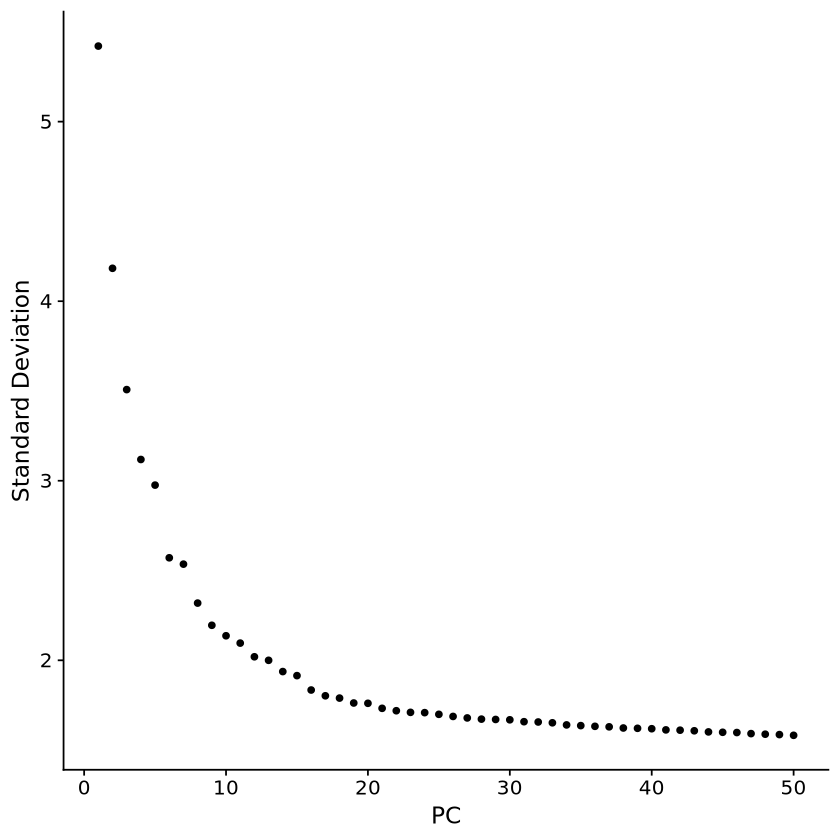

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.5092”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  8.7603e-16”


[intersect features] is 14859
[intersect_features][top 20]
 A1bg A1cf A2m A3galt2 A4galt A4gnt Aaas Aacs Aadac Aadacl2 Aadacl3 Aadat Aagab Aak1 Aamdc Aamp Aanat Aar2 Aard Aars2 


Computing nearest neighbors

Running UMAP projection

10:19:21 Read 646 rows

10:19:21 Processing block 1 of 1

10:19:21 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:19:21 Initializing by weighted average of neighbor coordinates using 1 thread

10:19:21 Commencing optimization for 167 epochs, with 19380 positive edges

10:19:21 Finished



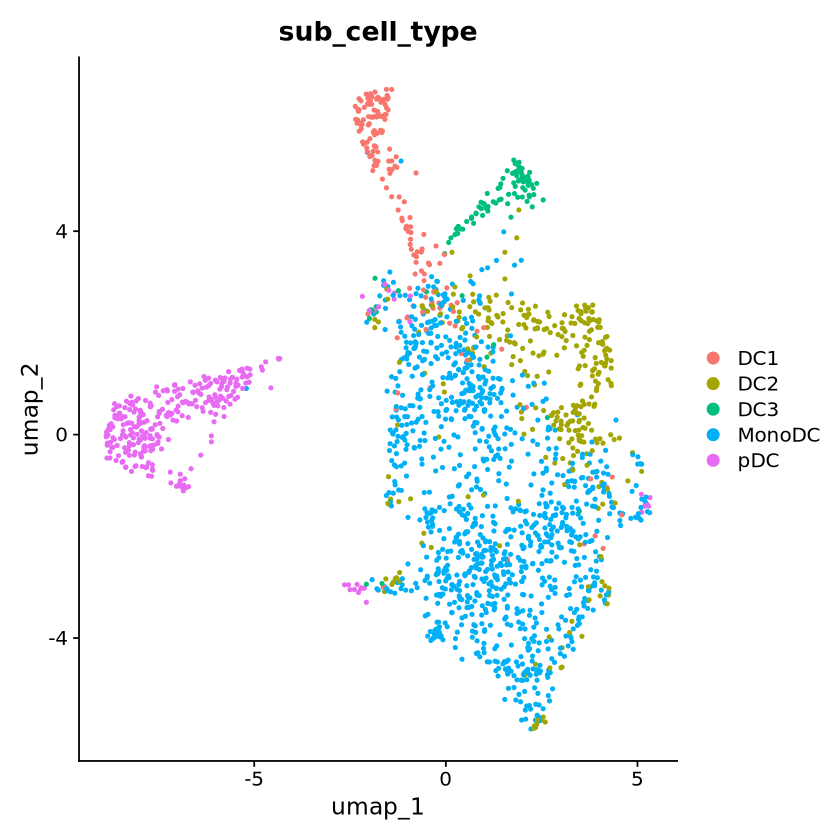

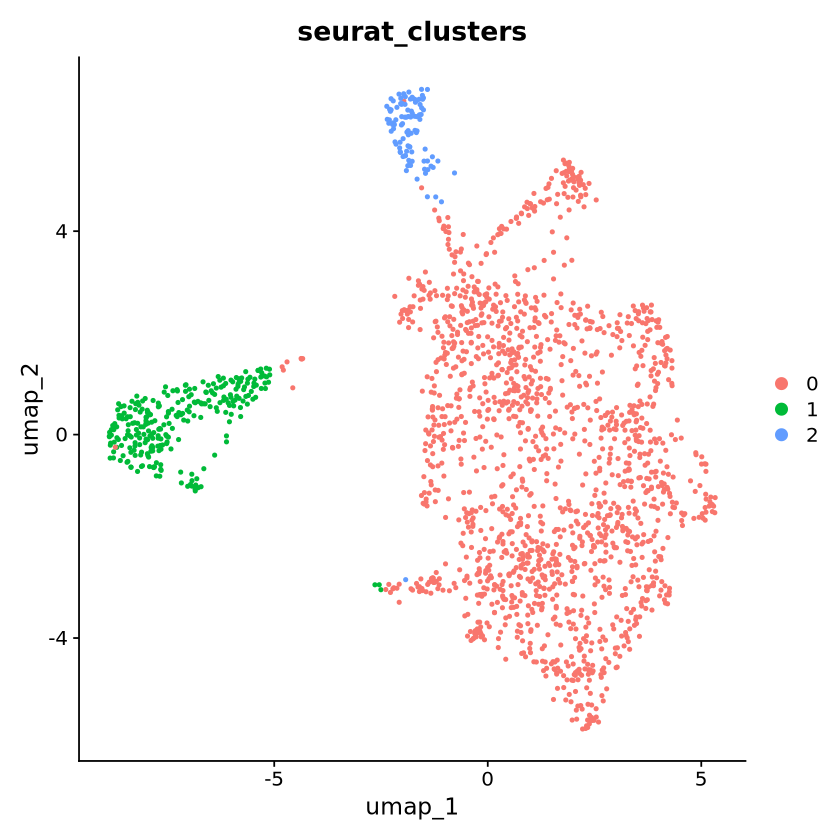

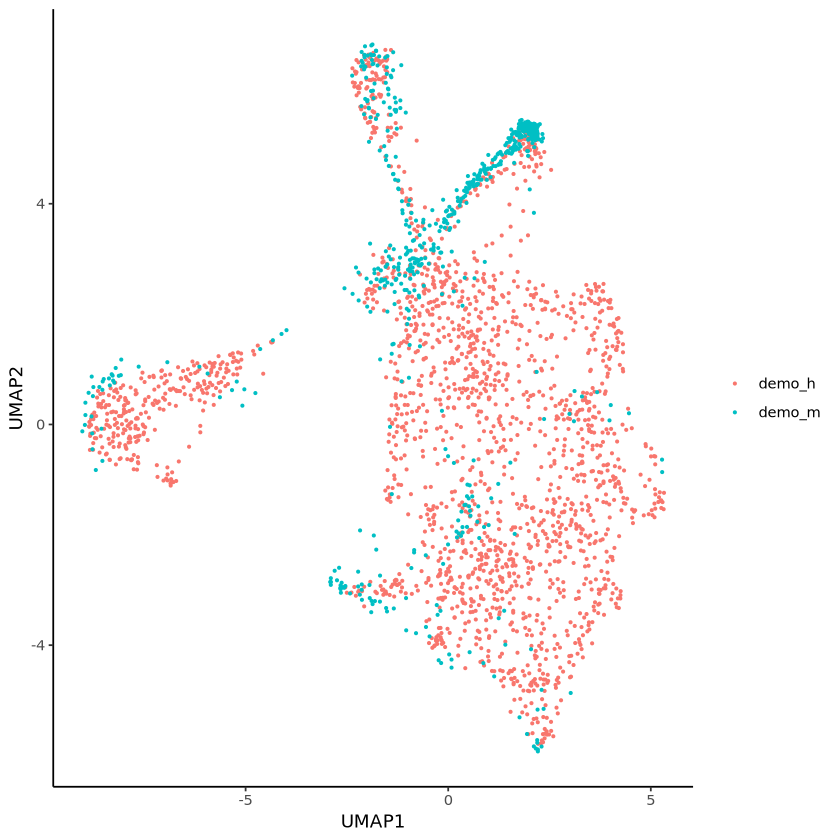

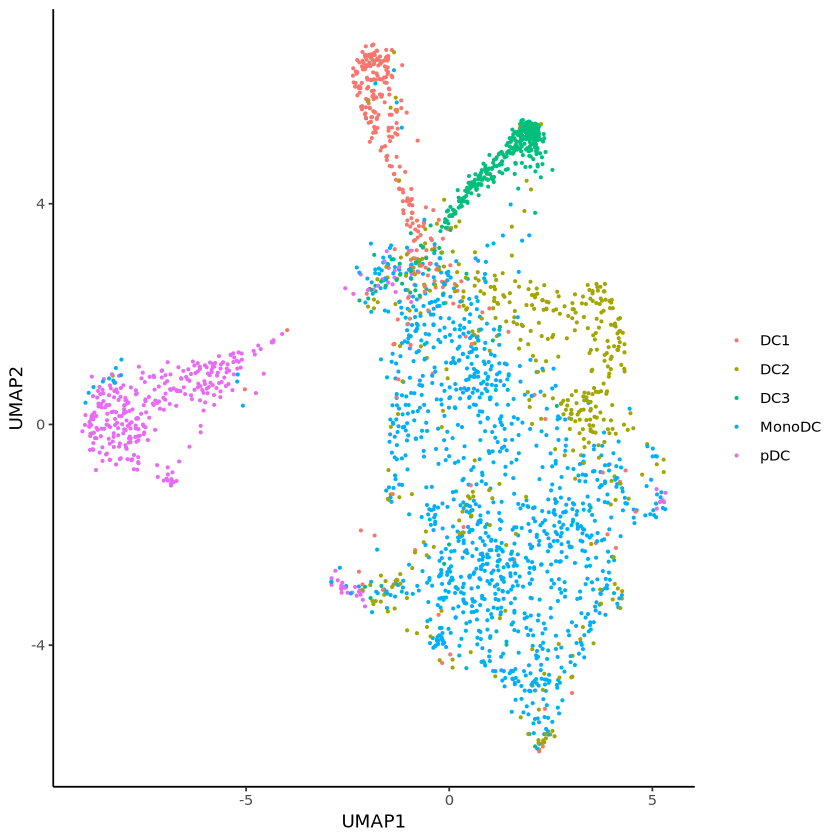

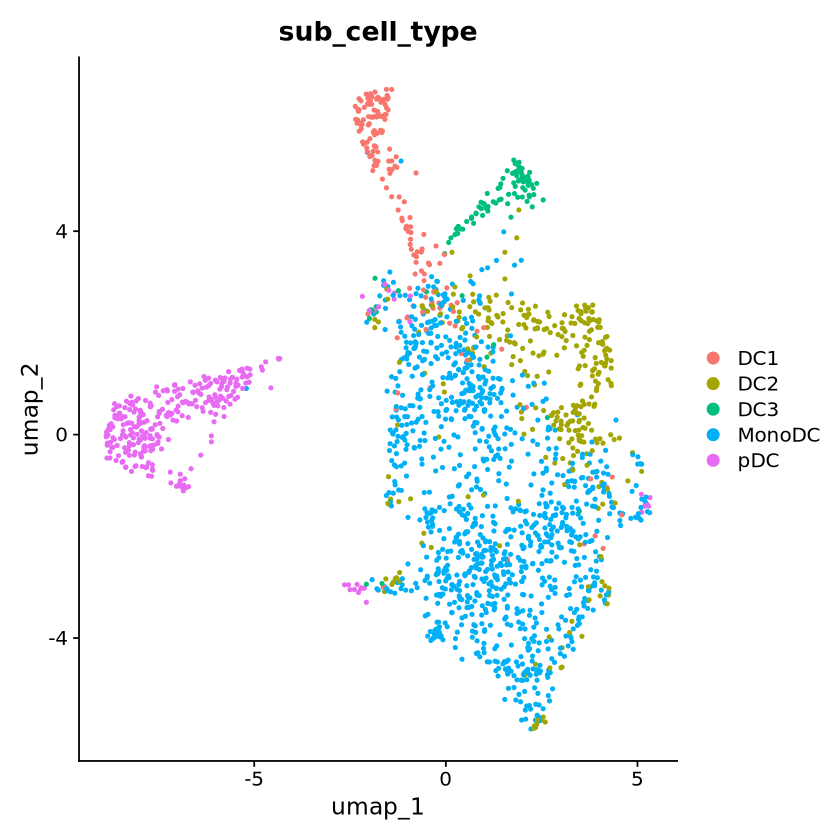

[confusion_matrix] head
        TP  FP  FN Precision     Recall   F1_Score
DC1     89  18  30 0.8317757 0.74789916 0.78761062
DC2      4   0 102 1.0000000 0.03773585 0.07272727
DC3    269   9  24 0.9676259 0.91808874 0.94220665
MonoDC  53 140  23 0.2746114 0.69736842 0.39405204
pDC     41  23  11 0.6406250 0.78846154 0.70689655
[has finish] ./res/demo_h-corss-m;Seurat;LChDCs-map-LCmDCs;is_1v1=True


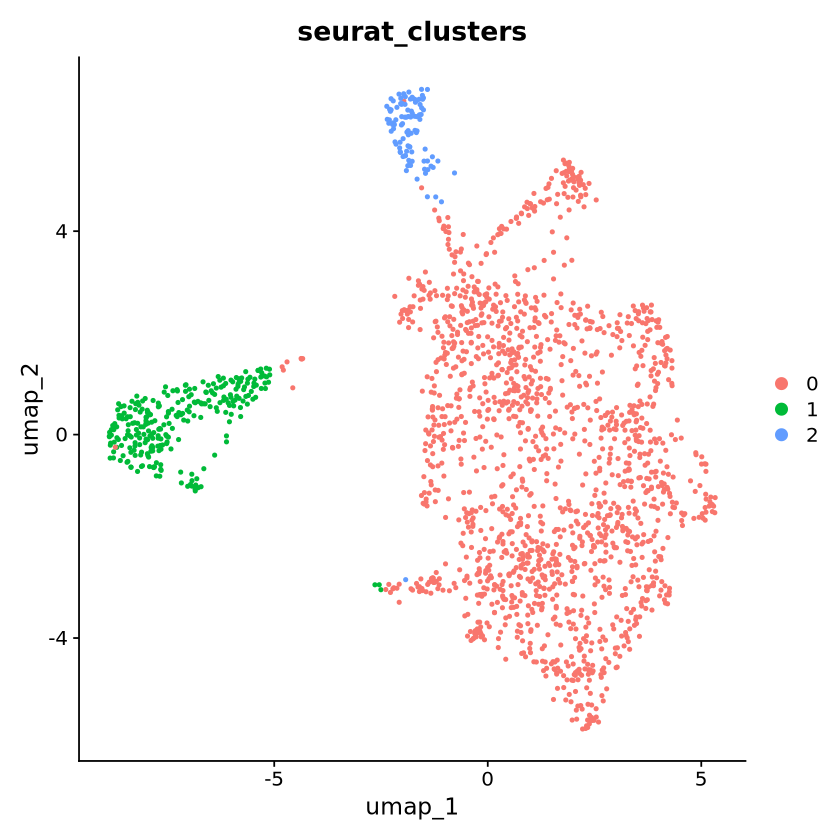

In [5]:
df_para %>% pwalk(run_not_aligned)

In [6]:
cat('\n[finish]\n')


[finish]
